## **Extracting the data**

In [2]:
# pip install yfinance

In [183]:
import yfinance as yf

# Define the ticker symbol for Jupiter Wagons
ticker_symbol = "JWL.BO"  # Adjust this ticker symbol if it's different for Jupiter Wagons on the Indian stock market

# Download the historical data
data = yf.download(ticker_symbol, start="2021-04-01", end="2024-03-31")

# Display the first few rows of the data
print(data.head())

# Save the data to a CSV file
data.to_csv("jupiter_wagons_data.csv")

[*********************100%%**********************]  1 of 1 completed

             Open       High    Low  Close  Adj Close  Volume
Date                                                         
2021-04-01  15.60  15.600000  15.15  15.15  15.116982     680
2021-04-05  15.15  15.400000  14.60  15.00  14.967308    9550
2021-04-06  15.35  15.750000  14.85  15.75  15.715673    2301
2021-04-07  15.30  16.000000  15.10  15.55  15.516109    2708
2021-04-08  15.95  16.200001  15.95  16.00  15.965129    4425


## **Clean the data**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split

In [6]:
# Load the data
file_path = 'jupiter_wagons_data.csv'
data = pd.read_csv(file_path, index_col='Date', parse_dates=True)

# Display the first few rows of the data
print(data.head())

             Open       High    Low  Close  Adj Close  Volume
Date                                                         
2021-04-01  15.60  15.600000  15.15  15.15  15.116982     680
2021-04-05  15.15  15.400000  14.60  15.00  14.967308    9550
2021-04-06  15.35  15.750000  14.85  15.75  15.715673    2301
2021-04-07  15.30  16.000000  15.10  15.55  15.516109    2708
2021-04-08  15.95  16.200001  15.95  16.00  15.965129    4425


In [7]:
# Clean the data: Drop columns that are not needed
data = data[['Close']]

# Check for missing values
print("Missing values before interpolation:")
print(data.isnull().sum())

Missing values before interpolation:
Close    0
dtype: int64


## **Interpolate missing values**

In [9]:
# Interpolate missing values
data.interpolate(method='time', inplace=True)

# Check for missing values again
print("Missing values after interpolation:")
print(data.isnull().sum())

Missing values after interpolation:
Close    0
dtype: int64


## **Plotting a line graph**

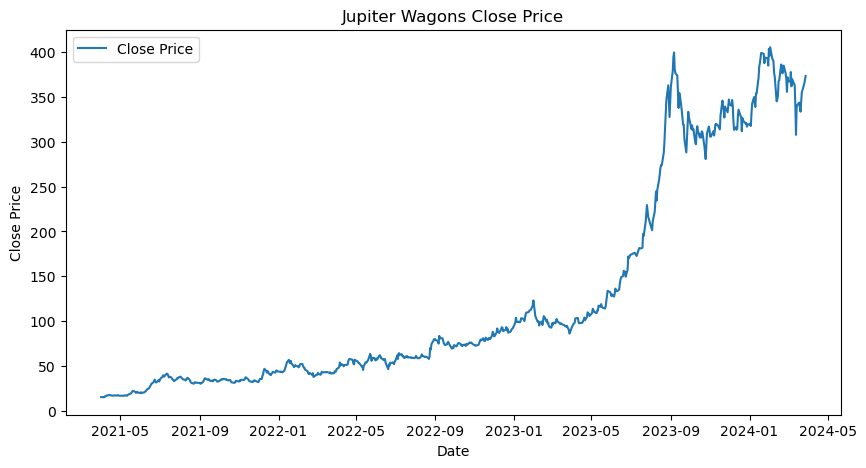

In [11]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(data, label='Close Price')
plt.title('Jupiter Wagons Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## **Split the data into training and test sets**

In [13]:
# Split the data into training and test sets
train_data, test_data = train_test_split(data, test_size=0.3, shuffle=False)

In [14]:
# Display the sizes of the train and test datasets
print("Training data size:", len(train_data))
print("Test data size:", len(test_data))

# Display the first few rows of the train and test datasets
print("Training data:\n", train_data.head())
print("Test data:\n", test_data.head())

Training data size: 505
Test data size: 217
Training data:
             Close
Date             
2021-04-01  15.15
2021-04-05  15.00
2021-04-06  15.75
2021-04-07  15.55
2021-04-08  16.00
Test data:
                  Close
Date                  
2023-04-20  103.830002
2023-04-21  100.930000
2023-04-24  104.480003
2023-04-25  109.699997
2023-04-26  108.790001


## **Convert the data to monthly frequency**

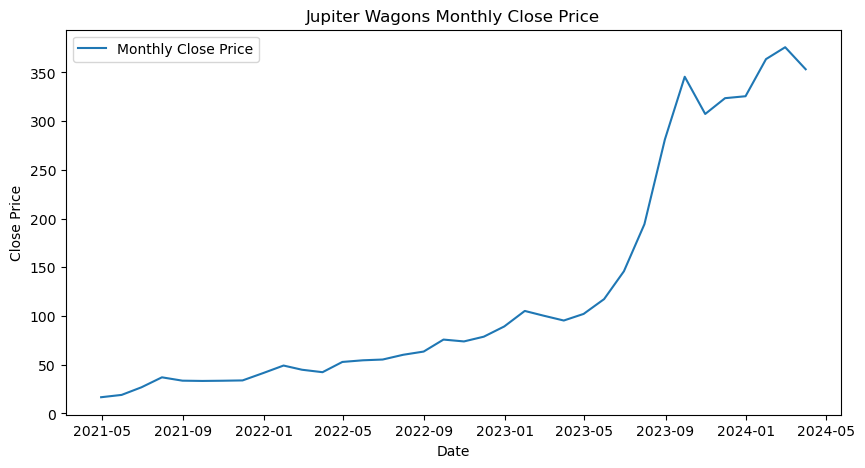

In [16]:
# Convert the data to monthly frequency
monthly_data = data.resample('M').mean()

# Plot the monthly data
plt.figure(figsize=(10, 5))
plt.plot(monthly_data, label='Monthly Close Price')
plt.title('Jupiter Wagons Monthly Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## **Decompose the time series into components**

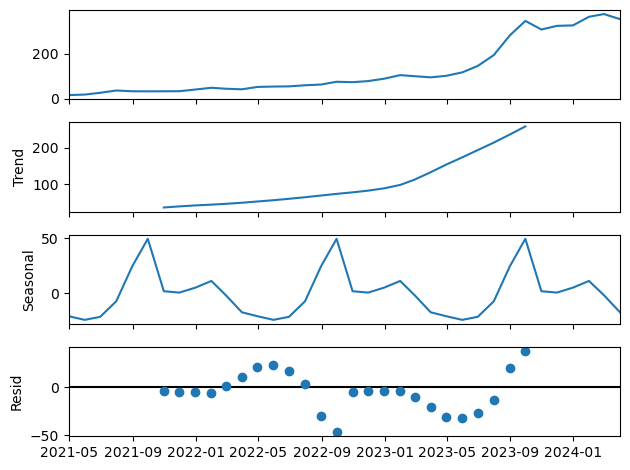

In [18]:
# Decompose the time series using additive model
additive_decompose = seasonal_decompose(monthly_data, model='additive')
additive_decompose.plot()
plt.show()

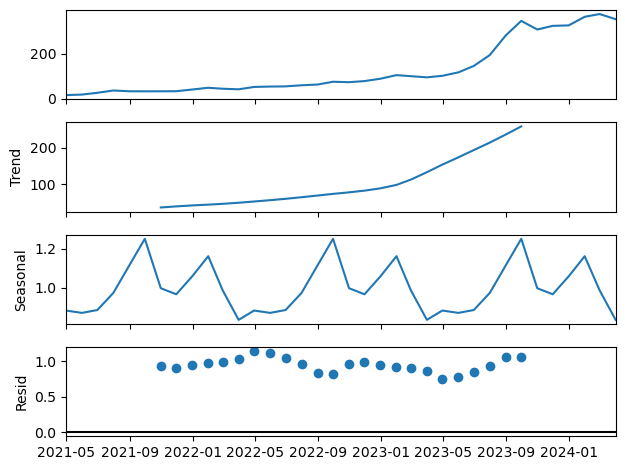

In [19]:
# Decompose the time series using multiplicative model
multiplicative_decompose = seasonal_decompose(monthly_data, model='multiplicative')
multiplicative_decompose.plot()
plt.show()

# 1. **Univariate Forecasting - Conventional Models/Statistical Models**

## a. **Holt-Winters Model**

In [175]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Holt-Winters model
holt_winters_model = ExponentialSmoothing(monthly_data, seasonal='add', seasonal_periods=12).fit()

# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(12)

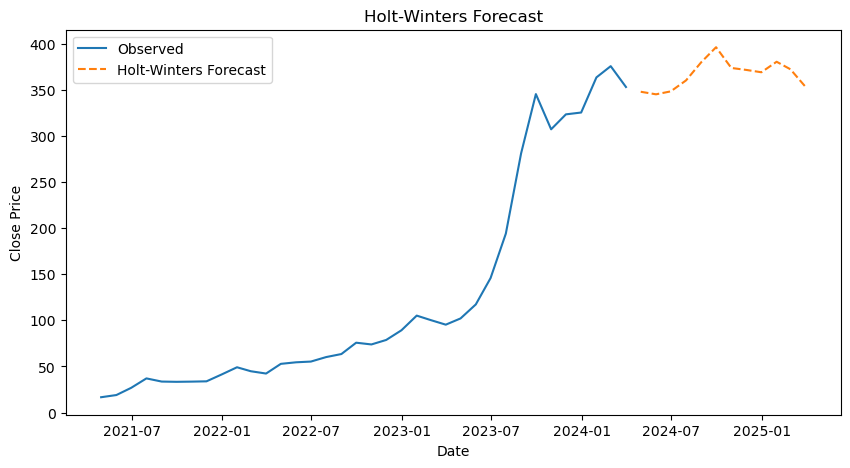

In [177]:
# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(monthly_data, label='Observed')
plt.plot(holt_winters_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title('Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [179]:
forecasted_values = holt_winters_forecast

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, holt_winters_forecast)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 413.5710124261197


## b. **ARIMA Model**

#### (i). **ARIMA Model - Daily Data**

In [26]:
# Interpolate missing values
data.interpolate(method='time', inplace=True)

# Convert the data to daily frequency
daily_data = data.resample('D').mean()

# Interpolate missing values in the daily data (if any)
daily_data.interpolate(method='time', inplace=True)

# Display the first few rows of the daily data
print(daily_data.head())

# Save the daily data to a new CSV file
daily_data.to_csv('daily_jupiter_wagons_data.csv')

              Close
Date               
2021-04-01  15.1500
2021-04-02  15.1125
2021-04-03  15.0750
2021-04-04  15.0375
2021-04-05  15.0000


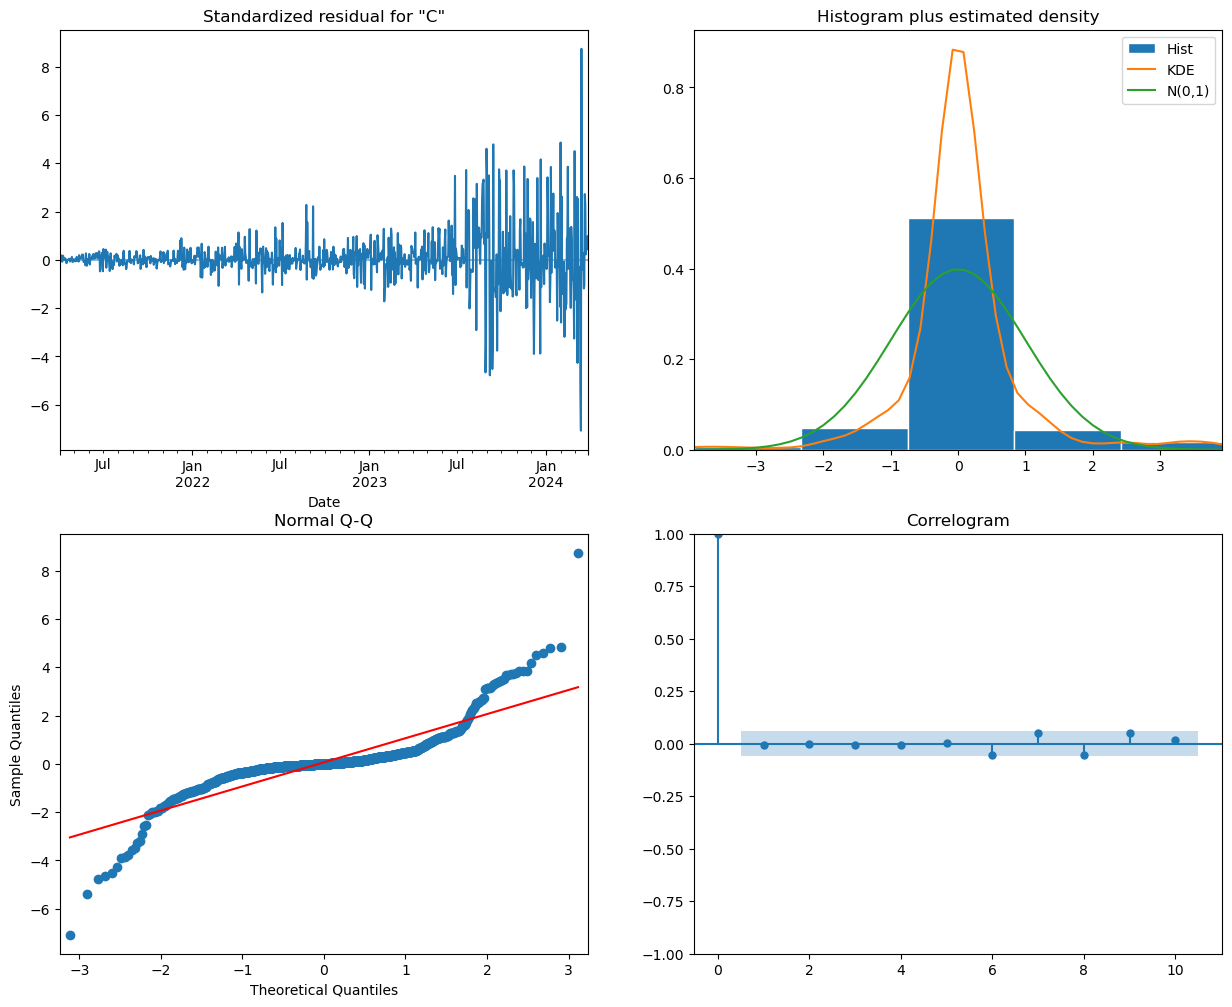

In [27]:
import statsmodels.api as sm

# Fit the ARIMA model
arima_model = sm.tsa.ARIMA(daily_data, order=(5, 1, 0)).fit()

# Diagnostic checks for ARIMA model
arima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

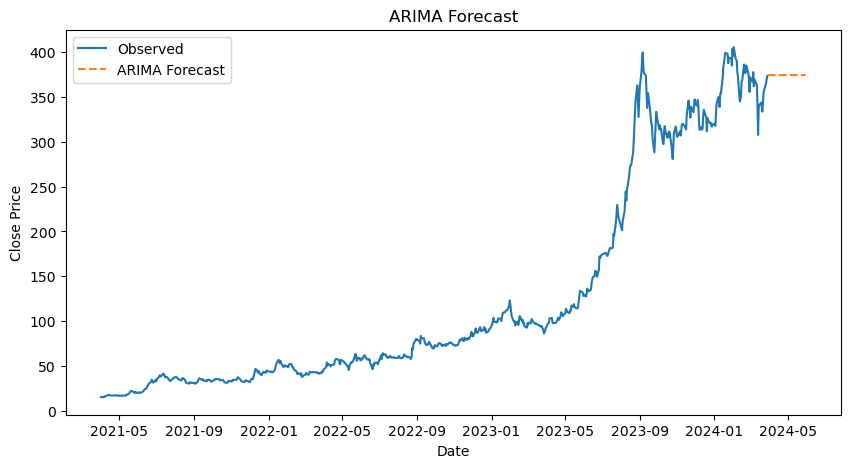

In [28]:
# Forecast for the next 3 months (assuming 21 trading days per month)
arima_forecast = arima_model.forecast(steps=63)

# Plot the ARIMA forecast
plt.figure(figsize=(10, 5))
plt.plot(daily_data, label='Observed')
plt.plot(arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [141]:
# Calculate the Mean Squared Error (MSE)
actual_values = daily_data['Close'][-len(arima_forecast):]  # Last 9 months actual values (since we only have 9 months in sample data)
forecasted_values = arima_forecast

mse = mean_squared_error(actual_values, forecasted_values)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 196.06579885940837


#### (ii). **ARIMA Model - Monthly Data**

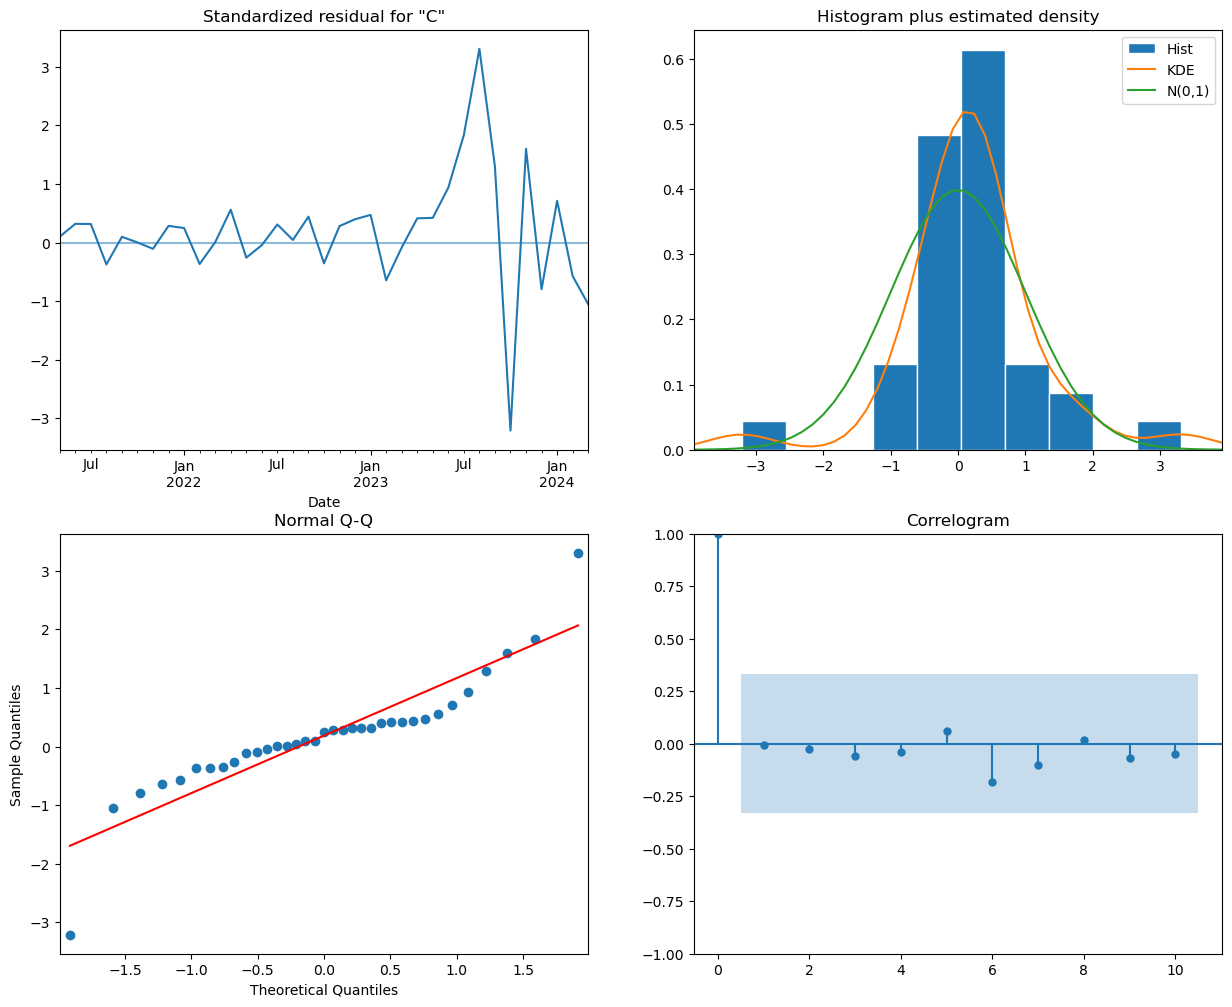

In [30]:
# Fit the ARIMA model on the monthly data
arima_model = sm.tsa.ARIMA(monthly_data, order=(5, 1, 0)).fit()

# Diagnostic checks for ARIMA model
arima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

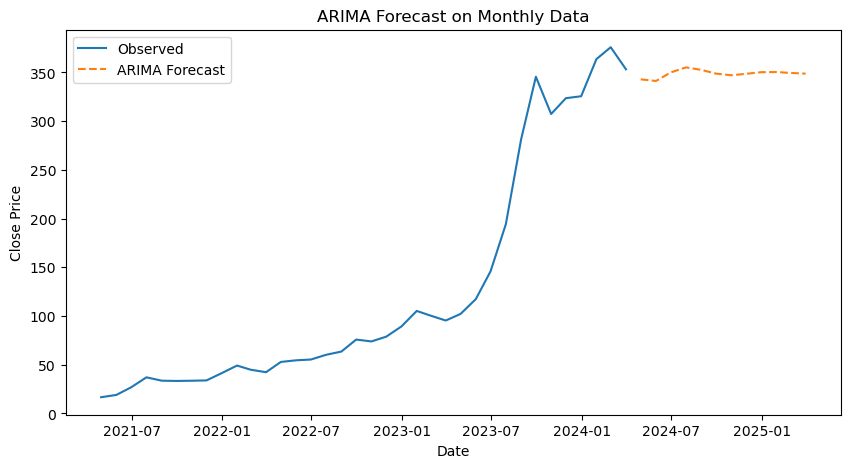

In [31]:
# Forecast for the next 12 months
arima_forecast = arima_model.forecast(steps=12)

# Plot the ARIMA forecast
plt.figure(figsize=(10, 5))
plt.plot(monthly_data, label='Observed')
plt.plot(arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.title('ARIMA Forecast on Monthly Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [139]:
# Calculate the Mean Squared Error (MSE)
actual_values = monthly_data['Close'][-len(arima_forecast):]  # Last 9 months actual values (since we only have 9 months in sample data)
forecasted_values = arima_forecast

mse = mean_squared_error(actual_values, forecasted_values)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 15376.535646062805


## c. **SARIMA Model**

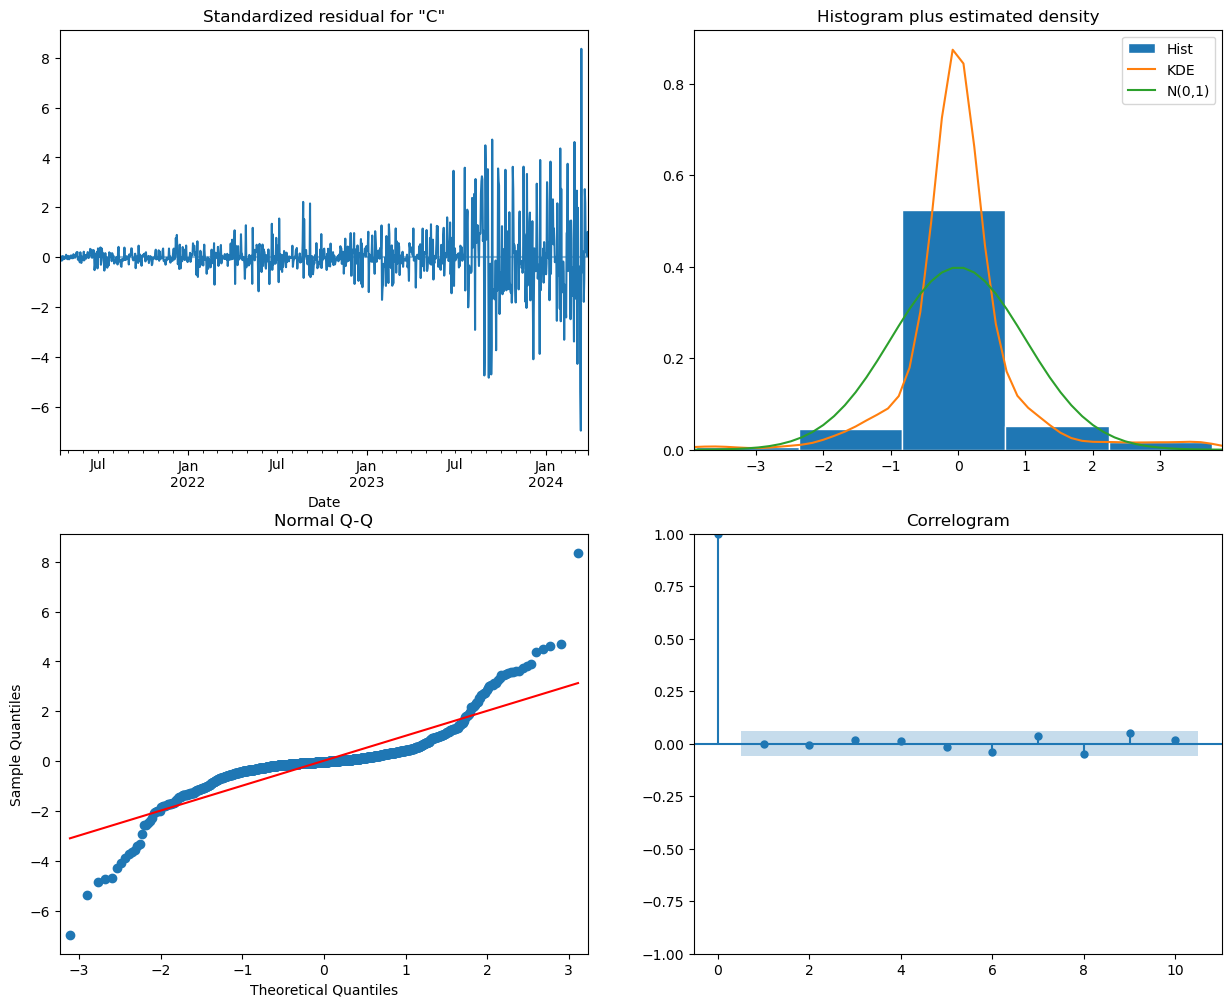

In [33]:
# Fit the SARIMA model
sarima_model = sm.tsa.statespace.SARIMAX(daily_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()

# Diagnostic checks for SARIMA model
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

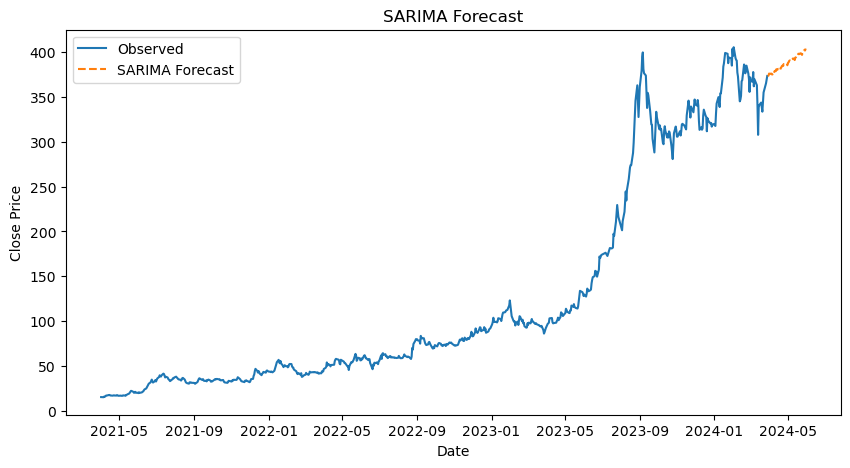

In [34]:
# Forecast for the next 3 months (assuming 21 trading days per month)
sarima_forecast = sarima_model.forecast(steps=63)

# Plot the SARIMA forecast
plt.figure(figsize=(10, 5))
plt.plot(daily_data, label='Observed')
plt.plot(sarima_forecast, label='SARIMA Forecast', linestyle='--')
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [127]:
actual_values = daily_data[-63:]  # Adjust as per your data structure
forecasted_values = sarima_forecast  # SARIMA forecasted values

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, forecasted_values)

print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 1044.936027084568


# 2. **Multivariate Forecasting - Machine Learning Models**

## A. **LSTM Model**

In [37]:
# pip install tensorflow

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [105]:
# Load the data
file_path = 'jupiter_wagons_data.csv'
data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [107]:
# Scale the features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [109]:
# Function to create sequences
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length, 3])  # Target is 'Close' price
    return np.array(sequences), np.array(labels)

# Create sequences
sequence_length = 30
X, y = create_sequences(scaled_data, sequence_length)

In [111]:
# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

C:\Users\Adarsh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [123]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"LSTM Mean Squared Error: {loss}")

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 2.0378e-04 - val_loss: 0.0103
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 3.1732e-04 - val_loss: 0.0027
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0037 - val_loss: 0.0170
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0036 - val_loss: 0.0024
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0045 - val_loss: 0.0157
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0021 - val_loss: 0.0038
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0011 - val_loss: 0.0165
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 7.0719e-04 - val_loss: 0.0091
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0011 - val_loss: 0.0190
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0029 - val_loss: 0.0600
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0029 - val_loss: 0.0064
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step

In [121]:
# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and true values to get them back to the original scale
y_test_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 5)), y_test.reshape(-1, 1)), axis=1))[:, 5]
y_pred_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), 5)), y_pred), axis=1))[:, 5]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [119]:
# Print some predictions and true values
print("Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_scaled[i]}, True Value: {y_test_scaled[i]}")

Predictions vs True Values:
Prediction: 5652269.492511928, True Value: 5143033.890686035
Prediction: 5748433.836070538, True Value: 5411220.609313965
Prediction: 5873141.873547911, True Value: 5641519.609313965
Prediction: 6012232.250372409, True Value: 5716552.78137207
Prediction: 6162814.527180194, True Value: 5438708.0
Prediction: 6280420.6188839665, True Value: 5371847.0
Prediction: 6357209.197159289, True Value: 5333959.281372071
Prediction: 6408517.089585423, True Value: 5056857.21862793
Prediction: 6415817.541244983, True Value: 4796099.5
Prediction: 6366426.925180792, True Value: 5046456.890686035


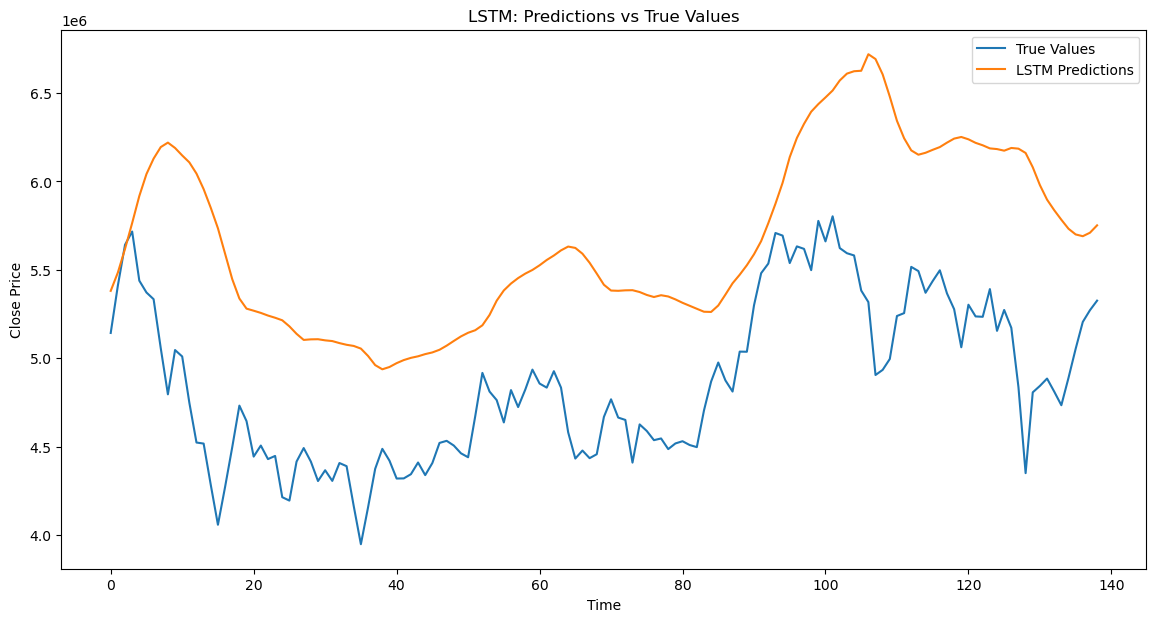

In [46]:
# Plot the predictions vs true values
plt.figure(figsize=(14, 7))
plt.plot(y_test_scaled, label='True Values')
plt.plot(y_pred_scaled, label='LSTM Predictions')
plt.title('LSTM: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## B. **Tree Based Models**

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [49]:
# Function to create sequences
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length, 3])  # Target is 'Close' price
    return np.array(sequences), np.array(labels)

# Create sequences
sequence_length = 30
X, y = create_sequences(data.values, sequence_length)

# Reshape X to 2D array for tree-based models
X_reshaped = X.reshape(X.shape[0], -1)

In [50]:
# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X_reshaped) * 0.8)
X_train, X_test = X_reshaped[:train_size], X_reshaped[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [51]:
# Train and evaluate the Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree Mean Squared Error: {mse_dt}")

Decision Tree Mean Squared Error: 924.2985601325141


In [52]:
# Train and evaluate the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")

Random Forest Mean Squared Error: 909.3356349840859


In [53]:
# Print some predictions and true values for both models
print("\nDecision Tree Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_dt[i]}, True Value: {y_test[i]}")


Decision Tree Predictions vs True Values:
Prediction: 345.75, True Value: 361.1000061035156
Prediction: 345.75, True Value: 379.1499938964844
Prediction: 345.75, True Value: 394.6499938964844
Prediction: 345.75, True Value: 399.7000122070313
Prediction: 345.75, True Value: 381.0
Prediction: 345.75, True Value: 376.5
Prediction: 345.75, True Value: 373.9500122070313
Prediction: 345.75, True Value: 355.29998779296875
Prediction: 345.75, True Value: 337.75
Prediction: 345.75, True Value: 354.6000061035156


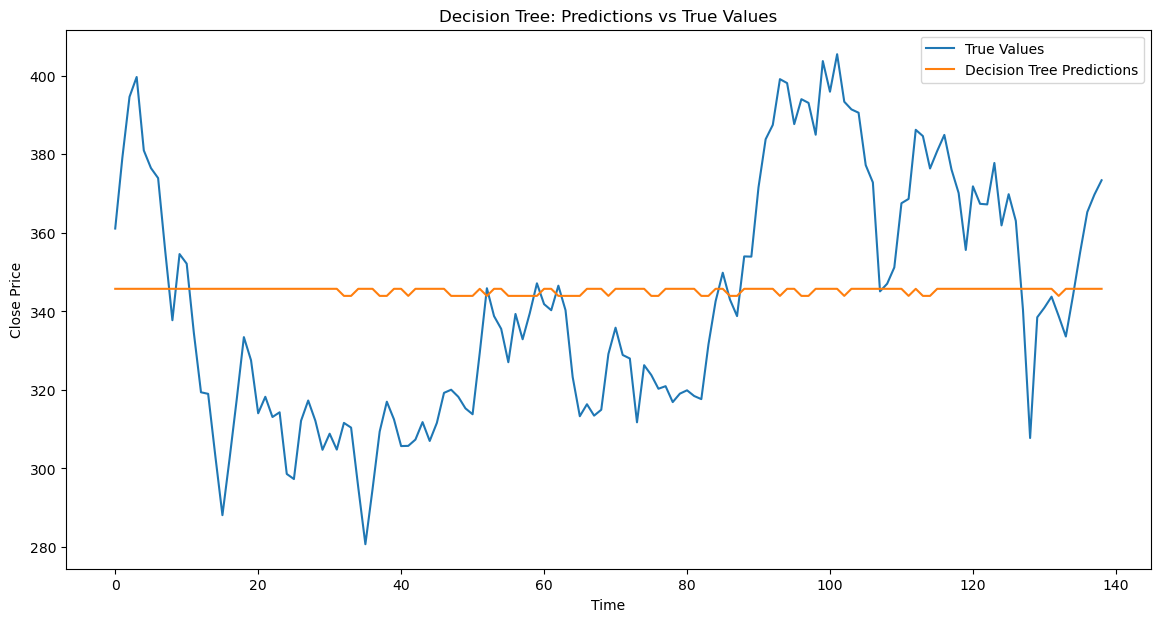

In [54]:
# Plot the predictions vs true values for Decision Tree
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.title('Decision Tree: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [55]:
print("\nRandom Forest Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_rf[i]}, True Value: {y_test[i]}")


Random Forest Predictions vs True Values:
Prediction: 342.18950286865237, True Value: 361.1000061035156
Prediction: 341.5080029296875, True Value: 379.1499938964844
Prediction: 341.1485021972656, True Value: 394.6499938964844
Prediction: 339.84500213623045, True Value: 399.7000122070313
Prediction: 341.4105026245117, True Value: 381.0
Prediction: 341.2830029296875, True Value: 376.5
Prediction: 343.36250396728514, True Value: 373.9500122070313
Prediction: 342.2235040283203, True Value: 355.29998779296875
Prediction: 341.06350372314455, True Value: 337.75
Prediction: 341.92900421142576, True Value: 354.6000061035156


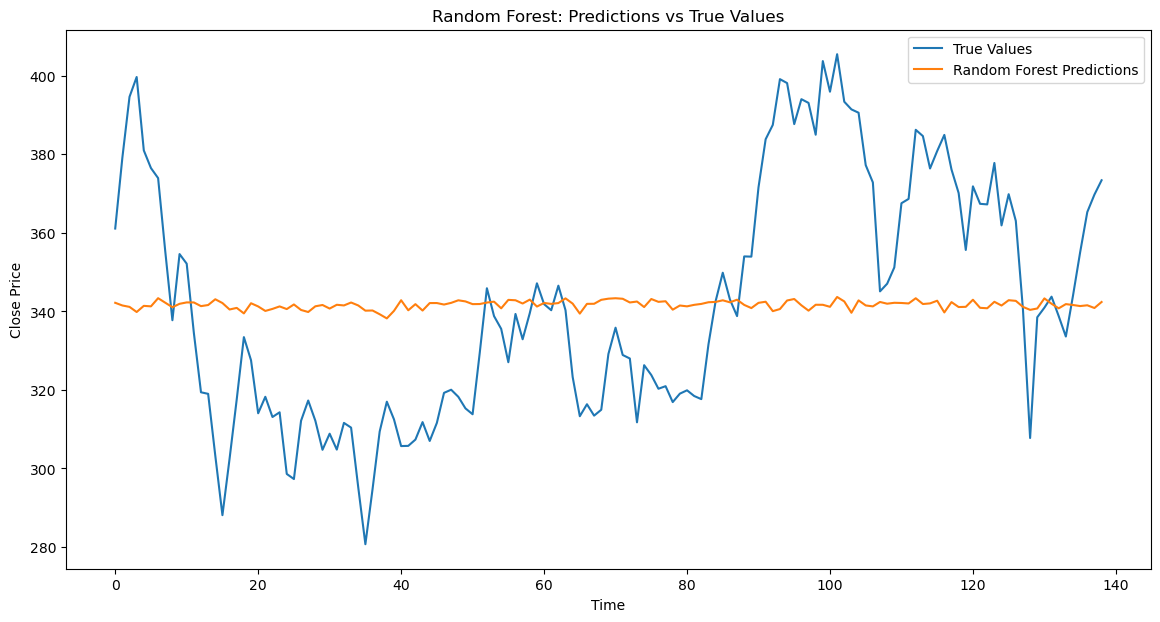

In [56]:
# Plot the predictions vs true values for Random Forest
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

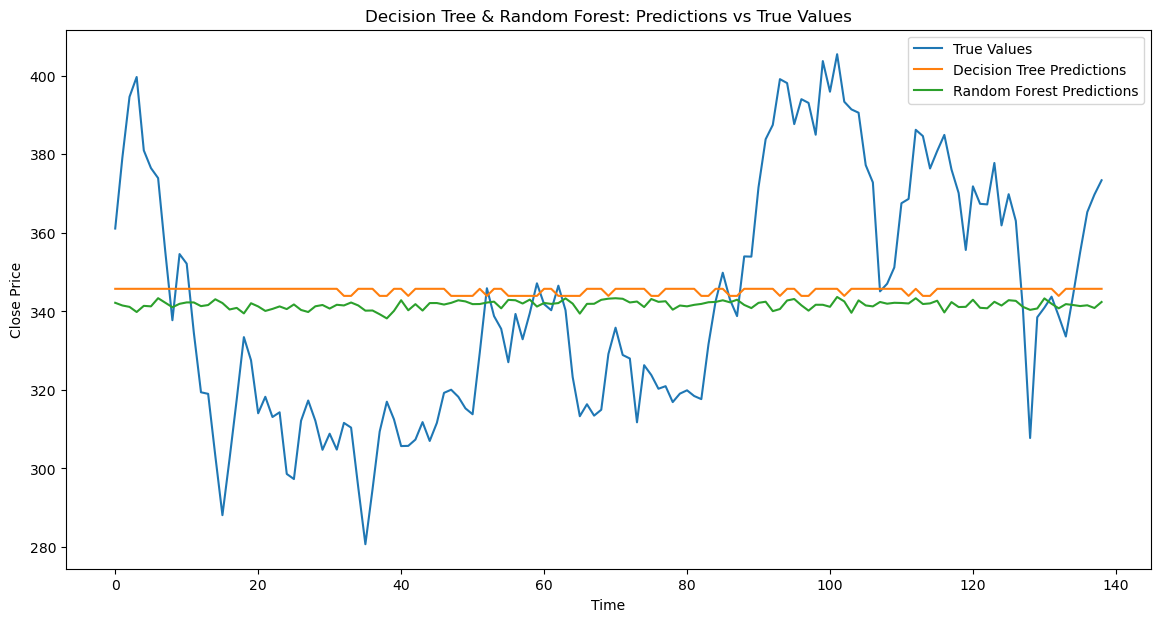

In [57]:
# Plot both Decision Tree and Random Forest predictions together
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Decision Tree & Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()